In [ ]:
from google.colab import drive
drive.mount('/content/drive')




Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import os
os.listdir('/content/drive/My Drive')


['LabanKey',
 'Classroom',
 '11A01_04_ND1.docx',
 '11A01_04_ND2 (1).docx',
 '11A01_04_ND2.docx',
 '11A01_04-ND-TH_23_10 (1).docx',
 'data_01.xls',
 '003 (1).pdf',
 '003.pdf',
 'PHẠM HOÀNG DŨNG-003.pdf',
 'Book1.xlsx',
 '11a01_04_13_11.docx',
 'ND1_11A1_PhamHoangDung_04.docx',
 '11A01_04-ND-TH_23_10.docx',
 'Biểu đồ không có tiêu đề.drawio',
 'Hoàng Dũng - 0.10,0.11,0.12,0.13.gdoc',
 '22110043.pdf',
 '22110043-T10.pdf',
 '22110043_Phạm Hoàng Dũng.pdf',
 'PhamHoangDung_22110043_tuan2.m',
 'ML_19_10.m',
 'PhamHoangDung_22110043_tuan4.m',
 'PhamHoangDung_22110043_tuan5.m',
 'PhamHoangDung_22110043_tuan6.m',
 'PhamHoangDung_22110043_tuan7.m',
 '[LTDD&XS]_GK_2022-2023.gdoc',
 'PhamHoangDung_22110043_tuan8.m',
 'PhamHoangDung_22110043_tuan9.m',
 'PhamHoangDung_22110043_07122023_sangT5.m',
 'PhamHoangDung_22110043_tuan11.m',
 'D_folder.rar',
 'PhamHoangDung_22110043.rar',
 'PhamHoangDung_22110043_1801_ca1.rar',
 'LTTK_22110043_PhamHoangDung_Test1.R',
 'LTTK_22110043_PhamHoangD

In [ ]:
train_images_path = '/content/drive/My Drive/train-images-idx3-ubyte.gz'
train_labels_path = '/content/drive/My Drive/train-labels-idx1-ubyte.gz'
test_images_path = '/content/drive/My Drive/t10k-images-idx3-ubyte.gz'
test_labels_path = '/content/drive/My Drive/t10k-labels-idx1-ubyte.gz'


In [ ]:
import os

# Định nghĩa đường dẫn file
file_paths = [
    '/content/drive/My Drive/train-images-idx3-ubyte.gz',
    '/content/drive/My Drive/train-labels-idx1-ubyte.gz',
    '/content/drive/My Drive/t10k-images-idx3-ubyte.gz',
    '/content/drive/My Drive/t10k-labels-idx1-ubyte.gz'
]

# Kiểm tra sự tồn tại của từng file và in kết quả
for file_path in file_paths:
    if os.path.exists(file_path):
        print(f"{file_path} đã được tải lên thành công.")
    else:
        print(f"{file_path} chưa được tải lên.")


/content/drive/My Drive/train-images-idx3-ubyte.gz đã được tải lên thành công.
/content/drive/My Drive/train-labels-idx1-ubyte.gz đã được tải lên thành công.
/content/drive/My Drive/t10k-images-idx3-ubyte.gz đã được tải lên thành công.
/content/drive/My Drive/t10k-labels-idx1-ubyte.gz đã được tải lên thành công.


In [ ]:
import numpy as np
from scipy import stats
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import struct
import gzip
import shutil

def load_mnist(path, kind='train'):
    """Load MNIST data from `path`"""
    labels_path = os.path.join(path, f'{kind}-labels-idx1-ubyte')
    images_path = os.path.join(path, f'{kind}-images-idx3-ubyte')

    with open(labels_path, 'rb') as lbpath:
        magic, n = struct.unpack('>II', lbpath.read(8))
        labels = np.fromfile(lbpath, dtype=np.uint8)

    with open(images_path, 'rb') as imgpath:
        magic, num, rows, cols = struct.unpack('>IIII', imgpath.read(16))
        images = np.fromfile(imgpath, dtype=np.uint8).reshape(len(labels), 784)

    return images, labels

# Giải nén các file .gz
files = [
    "/content/drive/My Drive/t10k-images-idx3-ubyte.gz",
    "/content/drive/My Drive/t10k-labels-idx1-ubyte.gz",
    "/content/drive/My Drive/train-images-idx3-ubyte.gz",
    "/content/drive/My Drive/train-labels-idx1-ubyte.gz"
]

for file in files:
    with gzip.open(file, 'rb') as f_in:
        with open(file.replace('.gz', ''), 'wb') as f_out:
            shutil.copyfileobj(f_in, f_out)

# Gọi hàm load_mnist để tải dữ liệu
X_train, y_train = load_mnist('/content/drive/My Drive', kind='train')
X_test, y_test = load_mnist('/content/drive/My Drive', kind='t10k')

# In thông tin về dữ liệu
print(f"X_train shape: {X_train.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"y_test shape: {y_test.shape}")

print(f"Type of X_train: {type(X_train)}")
print(f"Type of y_train: {type(y_train)}")
print(f"Type of X_test: {type(X_test)}")
print(f"Type of y_test: {type(y_test)}")

print(f"Data type of X_train: {X_train.dtype}")
print(f"Data type of y_train: {y_train.dtype}")


X_train shape: (60000, 784)
y_train shape: (60000,)
X_test shape: (10000, 784)
y_test shape: (10000,)
Type of X_train: <class 'numpy.ndarray'>
Type of y_train: <class 'numpy.ndarray'>
Type of X_test: <class 'numpy.ndarray'>
Type of y_test: <class 'numpy.ndarray'>
Data type of X_train: uint8
Data type of y_train: uint8


In [ ]:
unique, counts = np.unique(y_train, return_counts=True)
print(f'Label distribution: {dict(zip(unique, counts))}')

Label distribution: {0: 6000, 1: 6000, 2: 6000, 3: 6000, 4: 6000, 5: 6000, 6: 6000, 7: 6000, 8: 6000, 9: 6000}


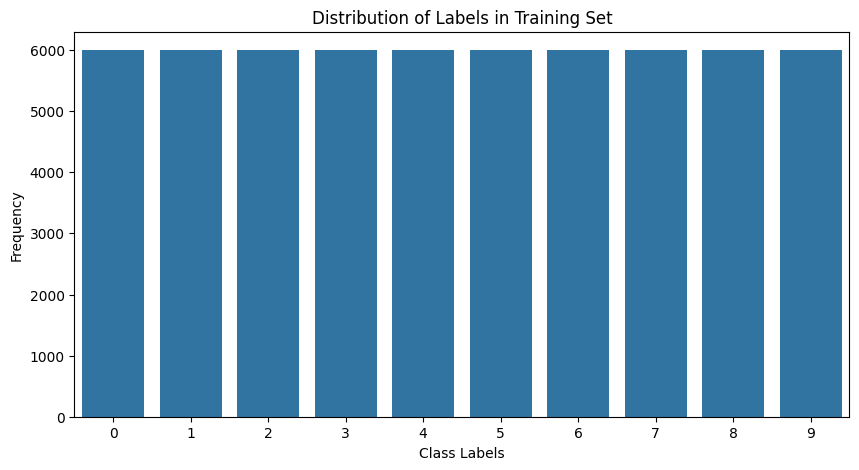

In [ ]:
y_train_df = pd.DataFrame(y_train, columns=['Labels'])

plt.figure(figsize=(10, 5))
sns.countplot(x='Labels', data=y_train_df)
plt.title('Distribution of Labels in Training Set')
plt.xlabel('Class Labels')
plt.ylabel('Frequency')
plt.show()

2. Show sample image

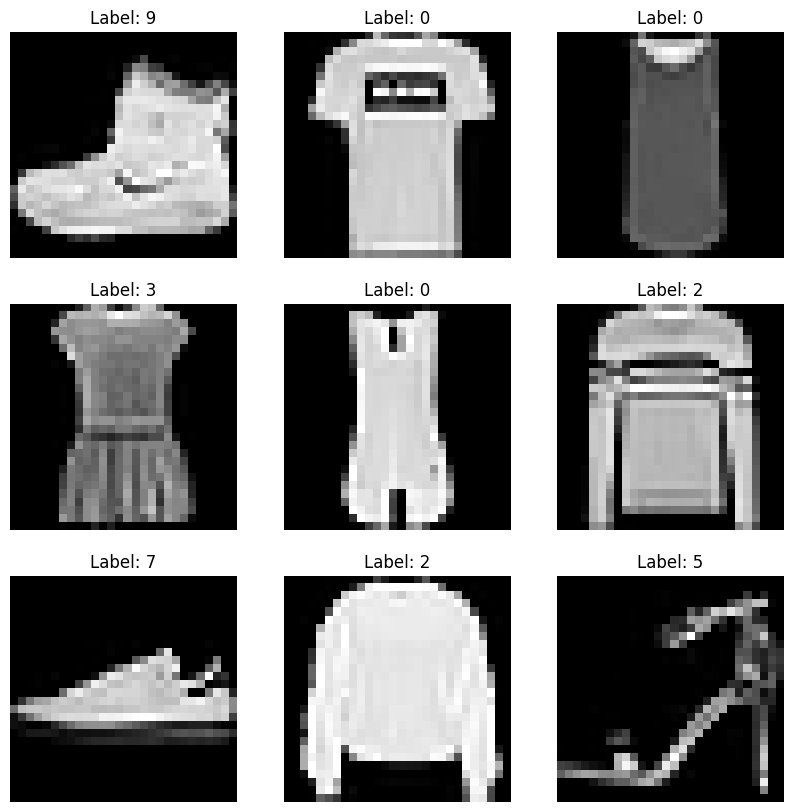

In [ ]:
plt.figure(figsize=(10, 10))

for i in range(9):
    plt.subplot(3, 3, i + 1)
    plt.imshow(X_train[i].reshape(28, 28), cmap='gray')
    plt.title(f"Label: {y_train[i]}")
    plt.axis('off')
plt.show()

In [ ]:
print(f'Number of NaNs in training data: {np.isnan(X_train).sum()}')
print(f'Number of NaNs in testing data: {np.isnan(X_test).sum()}')

Number of NaNs in training data: 0
Number of NaNs in testing data: 0


In [ ]:
X_train = X_train.astype('float32') / 255.0
X_test = X_test.astype('float32') / 255.0

In [ ]:
print("Image dimensions in X_train:", X_train.shape[1:])

Image dimensions in X_train: (784,)


Mean pixel value: 0.28604018688201904
Standard deviation: 0.353023886680603


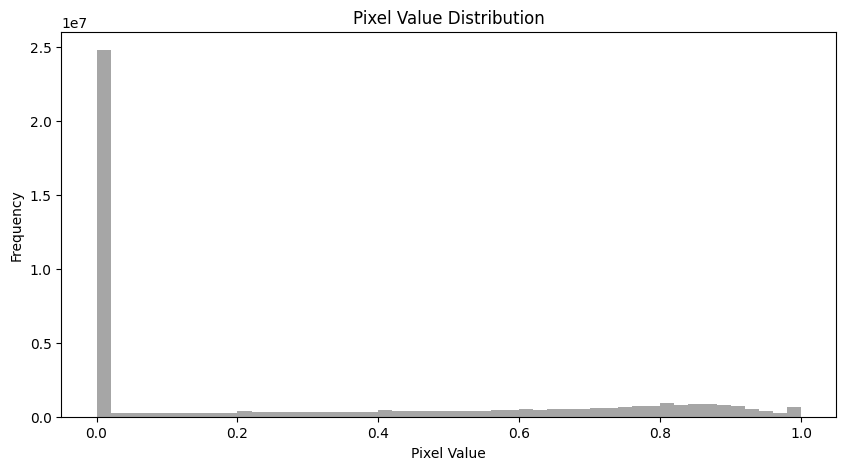

In [ ]:
print(f'Mean pixel value: {X_train.mean()}')
print(f'Standard deviation: {X_train.std()}')

plt.figure(figsize=(10, 5))
plt.hist(X_train.flatten(), bins=50, color='gray', alpha=0.7)
plt.title('Pixel Value Distribution')
plt.xlabel('Pixel Value')
plt.ylabel('Frequency')
plt.show()

In [ ]:
# Z-score
z_scores = np.abs(stats.zscore(X_train.reshape(X_train.shape[0], -1)))
outliers_z = np.where(z_scores > 3)

# IQR
Q1 = np.percentile(X_train, 25)
Q3 = np.percentile(X_train, 75)
IQR = Q3 - Q1
outliers_iqr = X_train[(X_train < (Q1 - 1.5 * IQR)) | (X_train > (Q3 + 1.5 * IQR))]

print(f'Number of outliers detected using Z-score: {len(outliers_z[0])}')
print(f'Number of outliers detected using IQR: {np.count_nonzero(outliers_iqr)}')

Number of outliers detected using Z-score: 351722
Number of outliers detected using IQR: 0


In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

print(f'Train set shape: {X_train.shape}, Train labels shape: {y_train.shape}')
print(f'Validation set shape: {X_val.shape}, Validation labels shape: {y_val.shape}')

Train set shape: (48000, 784), Train labels shape: (48000,)
Validation set shape: (12000, 784), Validation labels shape: (12000,)


In [ ]:
from sklearn.decomposition import PCA
# Khởi tạo đối tượng PCA với số comp = 50,100
my_pca_50 = PCA(n_components = 50)
my_pca_100 = PCA(n_components = 100)

my_pca_50.fit(X_train)
my_pca_50.fit(X_test)
pca_scale_50_X_train = my_pca_50.transform(X_train)
pca_scale_50_X_test = my_pca_50.transform(X_test)

print("Dữ liệu gốc X_train: ", X_train.shape)
print("Dữ liệu gốc X_test: ", X_test.shape)
print("Dữ liệu sau PCA của X_train:" , pca_scale_50_X_train.shape)
print("Dữ liệu sau PCA của X_test:" , pca_scale_50_X_test.shape)



my_pca_100.fit(X_train)
my_pca_100.fit(X_test)
pca_scale_100_X_train = my_pca_100.transform(X_train)
pca_scale_100_X_test = my_pca_100.transform(X_test)

print("Dữ liệu gốc X_train: ", X_train.shape)
print("Dữ liệu gốc X_test: ", X_test.shape)
print("Dữ liệu sau PCA của X_train:" , pca_scale_100_X_train.shape)
print("Dữ liệu sau PCA của X_test:" , pca_scale_100_X_test.shape)


Dữ liệu gốc X_train:  (60000, 784)
Dữ liệu gốc X_test:  (10000, 784)
Dữ liệu sau PCA của X_train: (60000, 50)
Dữ liệu sau PCA của X_test: (10000, 50)
Dữ liệu gốc X_train:  (60000, 784)
Dữ liệu gốc X_test:  (10000, 784)
Dữ liệu sau PCA của X_train: (60000, 100)
Dữ liệu sau PCA của X_test: (10000, 100)


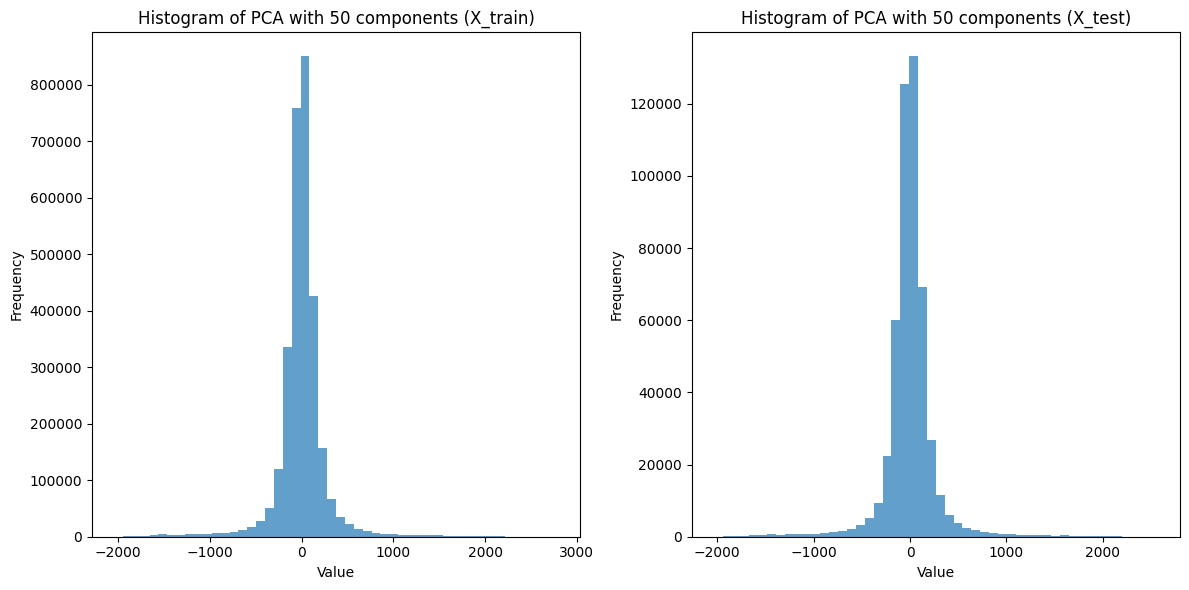

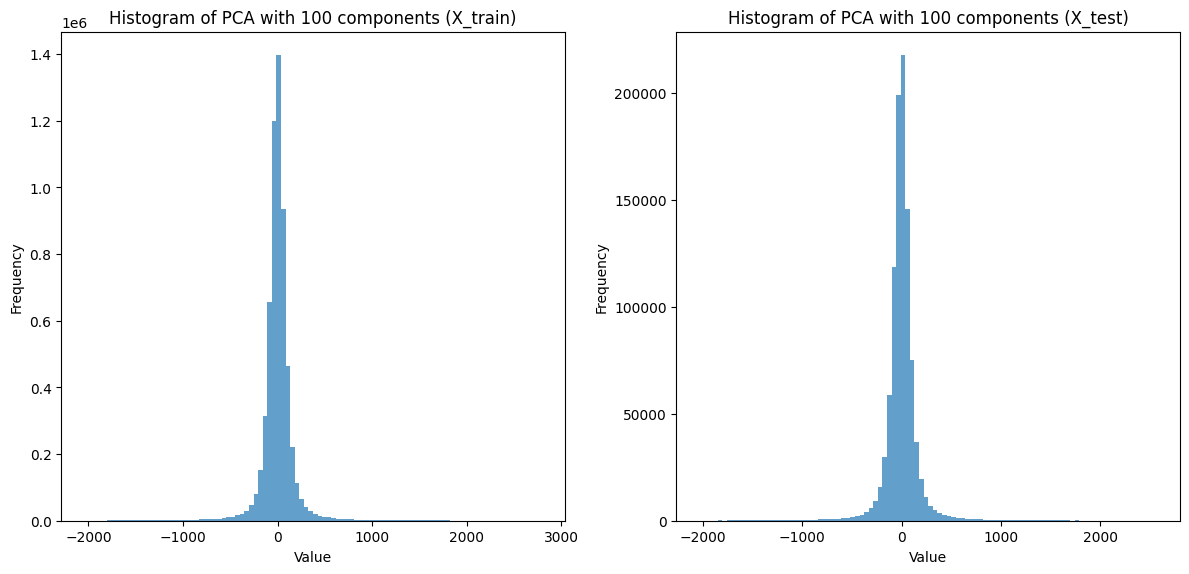

In [ ]:
import matplotlib.pyplot as plt

# Vẽ đồ thị histogram cho dữ liệu sau PCA với 50 thành phần chính
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.hist(pca_scale_50_X_train.flatten(), bins=50, alpha=0.7)
plt.title('Histogram of PCA with 50 components (X_train)')
plt.xlabel('Value')
plt.ylabel('Frequency')

plt.subplot(1, 2, 2)
plt.hist(pca_scale_50_X_test.flatten(), bins=50, alpha=0.7)
plt.title('Histogram of PCA with 50 components (X_test)')
plt.xlabel('Value')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

# Vẽ đồ thị histogram cho dữ liệu sau PCA với 100 thành phần chính
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.hist(pca_scale_100_X_train.flatten(), bins=100, alpha=0.7)
plt.title('Histogram of PCA with 100 components (X_train)')
plt.xlabel('Value')
plt.ylabel('Frequency')

plt.subplot(1, 2, 2)
plt.hist(pca_scale_100_X_test.flatten(), bins=100, alpha=0.7)
plt.title('Histogram of PCA with 100 components (X_test)')
plt.xlabel('Value')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()
